In [2]:
import pandas as pd
import numpy as np
import sys
import os
import random
from pathlib import Path
import imageio
import skimage
import skimage.io
import skimage.transform
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import seaborn as sns
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import scipy
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization,LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import tensorflow_addons as tfa
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import cv2

ModuleNotFoundError: No module named 'pandas'

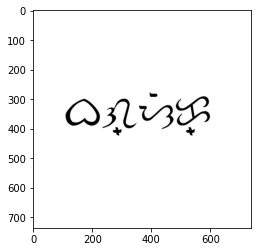

In [2]:
image_file = 'BAGSIK.jpg'
image_test = cv2.imread(image_file)
plt.imshow(image_test)
plt.show()

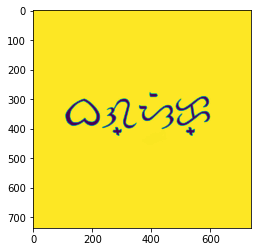

In [3]:
gray = cv2.cvtColor(image_test, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

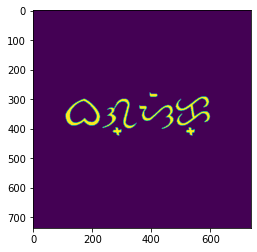

In [4]:
thresh1 = cv2.threshold(gray ,120,255,cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresh1)
plt.show()

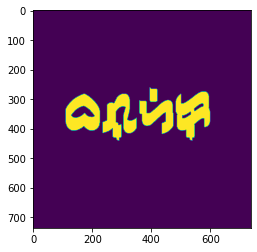

In [5]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,35))
dilated = cv2.dilate(thresh1, kernel, iterations=1)
plt.imshow(dilated)
plt.show()

In [6]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [7]:
import imutils
cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="left-to-right")[0]

In [8]:
for c in cnts:
    if cv2.contourArea(c) > 10:
        (x, y, w, h) = cv2.boundingRect(c)
        cv2.rectangle(image_test, (x, y), (x + w, y + h), (0, 255, 0), 2)

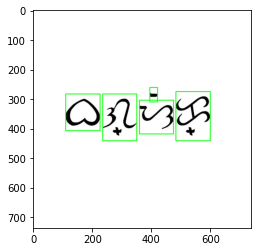

In [9]:
plt.imshow(image_test)
plt.show()